In [1]:
import vaex
import numpy as np
import pandas as pd
import vaex.jupyter.model as vjm
import matplotlib.pyplot as plt

import plotly.graph_objs as go

In [3]:
# how do I get a list of the column names from the vaex dataframe?

In [2]:
%%time
df = pd.read_csv("./example_data/run_GGM_CRlER_norm_st.csv", index_col="Unnamed: 0", float_precision='round_trip')
columns = df.columns
snaptimes = np.array([c.lstrip('R_') for c in columns if 'R_' in c])
print(snaptimes)

# every line is a planet with given period. radius is the initial radius at age 10 Myr, and the R_***** columns are the radii at different ages (which is the variable I want to use the slider on)

df.head()

['1.0e+01' '1.4e+01' '2.1e+01' '3.0e+01' '4.3e+01' '6.2e+01' '8.9e+01'
 '1.3e+02' '1.8e+02' '2.6e+02' '3.8e+02' '5.5e+02' '7.8e+02' '1.1e+03'
 '1.6e+03' '2.3e+03' '3.4e+03' '4.8e+03' '7.0e+03' '1.0e+04']
CPU times: user 638 ms, sys: 64.1 ms, total: 703 ms
Wall time: 702 ms


a     period  core_mass  core_radius       fenv  \
planet_0788  0.112639  13.317729  12.689014     1.975748  10.185638   
planet_4404  0.366166  72.851872   3.188877     1.342117   4.623543   
planet_1867  0.069655   6.497559   2.017214     1.180599   0.828645   
planet_4219  0.263565  51.507859   4.586966     1.485932   5.645340   
planet_0077  0.241868  39.665684   4.742179     1.499842   5.534923   

                  mass    radius   age         t_eq           Lx0  ...  \
planet_0788  14.128046  4.983004  10.0   896.291991  9.612899e+29  ...   
planet_4404   3.343463  3.779668  10.0   579.773855  5.344089e+30  ...   
planet_1867   2.034069  2.954967  10.0  1133.329901  2.667003e+30  ...   
planet_4219   4.861409  3.925586  10.0   480.787289  4.663488e+29  ...   
planet_0077   5.020034  3.998239  10.0   689.454406  4.659397e+30  ...   

             beta0_1.0e+04  beta_1.0e+04  Mdot0_1.0e+04  \
planet_0788       1.292375      1.196819   1.522023e+11   
planet_4404       1.636918      1.363947   1.883975e+11   
planet_1867       2.600374      1.580765   6.451294e+12   
planet_4219       1.371159      1.225119   2.091082e+10   
planet_0077       1.525100      1.328834   2.641110e+11   

             Mdot0_1.0e+04M_earth_per_Gyr  Mdot0_1.0e+04M_earth_per_yr  \
planet_0788                      0.803677                 8.036767e-10   
planet_4404                      0.994799                 9.947989e-10   
planet_1867                     34.064899                 3.406490e-08   
planet_4219                      0.110416                 1.104158e-10   
planet_0077                      1.394591                 1.394591e-09   

             Mdot_1.0e+04  Mdot_1.0e+04M_earth_per_Gyr  \
planet_0788  1.615018e+08                     0.000853   
planet_4404  3.895609e+07                     0.000206   
planet_1867  1.315217e+11                     0.694477   
planet_4219  1.670267e+07                     0.000088   
planet_0077  7.791274e+07                     0.000411   

             Mdot_1.0e+04M_earth_per_yr  t_ML_1.0e+04_Myr  t_ML_1.0e+04_Gyr  
planet_0788                8.527814e-13      1.605022e+06       1605.022243  
planet_4404                2.057006e-13      5.050548e+05        505.054787  
planet_1867                6.944767e-10      0.000000e+00          0.000000  
planet_4219                8.819545e-14      3.021322e+06       3021.322149  
planet_0077                4.114042e-13      5.642776e+05        564.277596  

[5 rows x 362 columns]

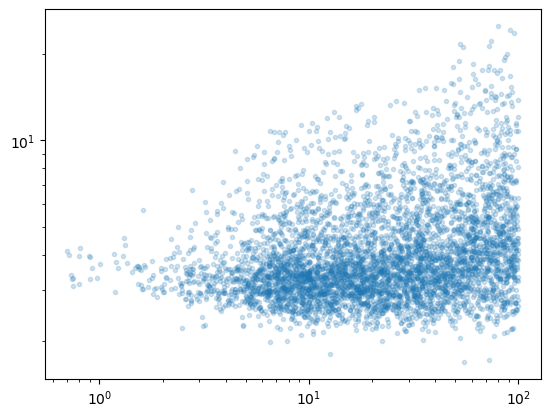

CPU times: user 987 ms, sys: 83.5 ms, total: 1.07 s
Wall time: 1.03 s


In [4]:
%%time
df = vaex.from_csv("./example_data/run_GGM_CRlER_norm_st.csv")
df.head()

# Define the axes
extend = 50
x_axis = vjm.Axis(df=df, expression=df.period, shape=100, min=-extend, max=extend)
y_axis = vjm.Axis(df=df, expression=df.radius, shape=100, min=-extend, max=extend)
# in this case we need to know the min and max 
# directly
#await vaex.jupyter.gather()

fig, ax = plt.subplots()
ax.plot(df.period.values, df.radius.values, '.', alpha=0.2)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [6]:
import plotly.graph_objects as go
import numpy as np

ylim = (0.5, np.max(df['radius'].values))

figure_height, figure_width = 700, 950
title = 'Time evo planet population'

layout = go.Layout(height=figure_height,
                    width=figure_width,
                    title=title,
                    xaxis=go.layout.XAxis(range=[np.min(df['period'].values), np.max(df['period'].values)]),
                    yaxis=go.layout.YAxis(range=[ylim[0], ylim[1]])
                    ) #title=str(y_axis.expression)
                    

# Create figure
fig = go.Figure(layout=layout)

# Add traces, one for each slider step
for step in snaptimes: #np.arange(1, 10, 1):
    fig.add_trace(
        go.Scatter( 
            visible=False,
            name="𝜈 = " + str(step),
            x=df['period'].values,
            y=df['R_'+step].values),
        )

# Make 10th trace visible
fig.data[0].visible = True


# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + snaptimes[i] + ' Myr'}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Age [Myr]: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.update_xaxes(title_text='Period [days]', type="log", range=[np.log10(np.min(df['period'].values)), np.log10(np.max(df['period'].values))])
fig.update_yaxes(title_text='Radius [R_Earth]', type="log", range=[np.log10(ylim[0]), np.log10(ylim[1])])
fig.update_traces(mode='markers', opacity=0.75, 
            marker=dict(
                color="rgba(152, 0, 0, .8)",##00CED1
                size=5,
                line=dict(
                    color='Black',
                    width=0.5
                )
            ),
)


fig.show()
